In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
import warnings
import pmdarima as pm
warnings.filterwarnings("ignore")
%matplotlib inline

In [113]:
df = pd.read_csv('IPG2211A2N.csv', index_col=0, parse_dates=True)
df.index.freq='MS'
df.head()

,IPG2211A2N
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


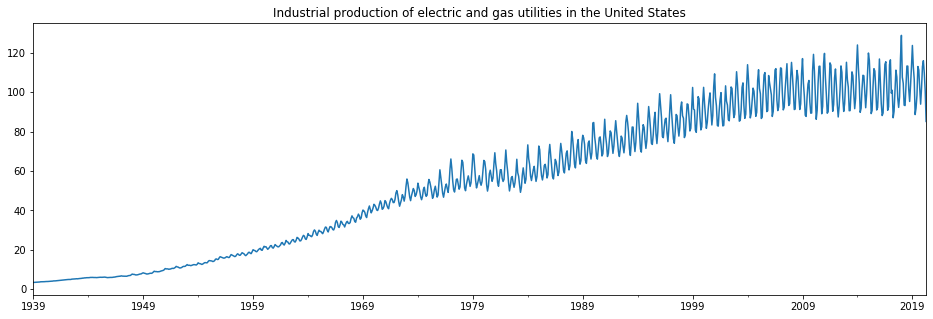

In [114]:
title = 'Industrial production of electric and gas utilities in the United States'
ylabel = ''
xlabel = ''
ax = df.IPG2211A2N.plot(figsize = (16,5), title=title)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

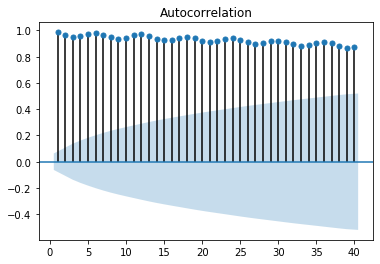

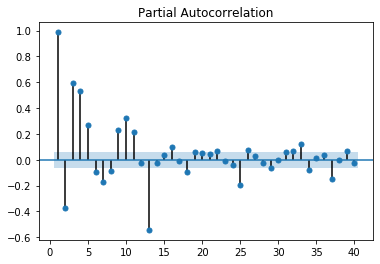

In [115]:
plot_acf(df.IPG2211A2N, zero=False, lags=40);
plot_pacf(df.IPG2211A2N, zero=False, lags=40);

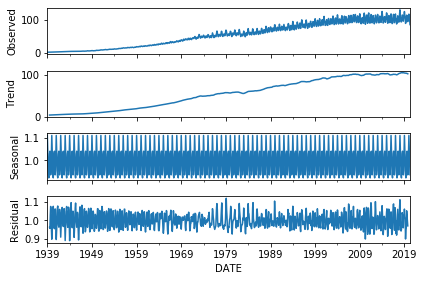

In [116]:
resd = seasonal_decompose(df.IPG2211A2N, model='multiplicative')
resd.plot();

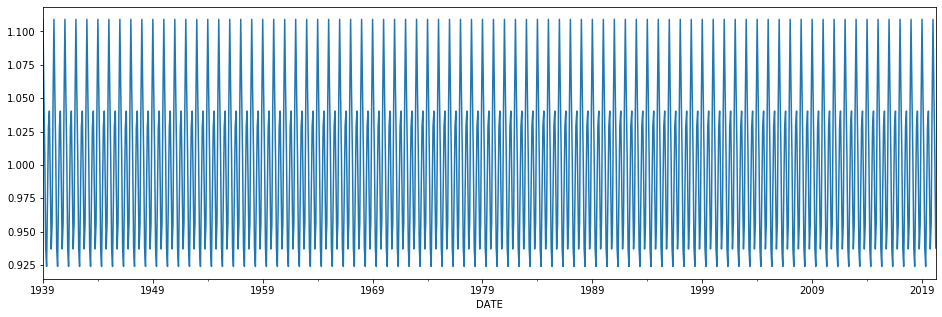

In [117]:
resd.seasonal.plot(figsize=(16,5))

(-9.579465726575032,
 2.1780800006757215e-16,
 22,
 952,
 {'1%': -3.437237626048241,
  '5%': -2.8645807475403657,
  '10%': -2.56838906578808},
 3942.880179765794)

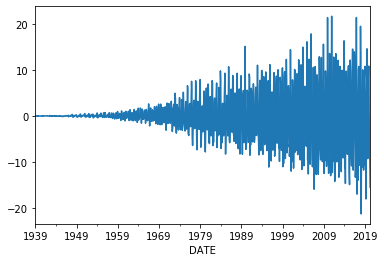

In [118]:
d = df['IPG2211A2N']
d1= d.diff(1)
df['d1'] = d1
df['d1'].plot()
df.dropna(inplace=True)
import statsmodels.tsa.stattools as tsa
tsa.adfuller(df.d1)

In [7]:
stepwise_model = auto_arima(df.IPG2211A2N, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3880.698, BIC=3905.048, Fit time=4.255 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=4385.387, BIC=4395.127, Fit time=0.095 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=4223.850, BIC=4243.331, Fit time=1.164 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=4000.015, BIC=4019.496, Fit time=1.919 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=3877.021, BIC=3906.241, Fit time=12.970 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=4060.599, BIC=4084.950, Fit time=6.989 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=3866.371, BIC=3900.461, Fit time=33.649 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=3986.280, BIC=4015.501, Fit time=23.227 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=3864.834, BIC=3903.795, Fit time=37.884 seconds
Fit ARIMA: order=(2, 1, 

In [8]:
train = df.loc['1985-01-01':'2016-12-01']
test = df.loc['2017-01-01':]

In [17]:
model = SARIMAX(train.IPG2211A2N, order=stepwise_model.order, seasonal_order=stepwise_model.seasonal_order)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                         IPG2211A2N   No. Observations:                  384
Model:             SARIMAX(3, 1, 3)x(2, 1, 2, 12)   Log Likelihood                -832.604
Date:                            Tue, 16 Jun 2020   AIC                           1687.208
Time:                                    15:41:56   BIC                           1730.286
Sample:                                01-01-1985   HQIC                          1704.317
                                     - 12-01-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2694      0.141     -9.018      0.000      -1.545      -0.993
ar.L2          0.0676      0.111      0.607      0.544      -0.150       0.286
ar.L3          0.3541      0.094      3.781      0.000       0.171       0.538
ma.L1          0.8672      0.121      7.142      0.000       0.629       1.105
ma.L2         -0.8746      0.038    -22.757      0.000      -0.950      -0.799
ma.L3         -0.7862      0.110     -7.177      0.000      -1.001      -0.571
ar.S.L12       0.6989      0.134      5.219      0.000       0.436       0.961
ar.S.L24      -0.2688      0.061     -4.399      0.000      -0.388      -0.149
ma.S.L12      -1.4667      0.133    -11.059      0.000      -1.727      -1.207
ma.S.L24       0.6445      0.108      5.970      0.000       0.433       0.856
sigma2         4.9842      0.318     15.691      0.000       4.362       5.607
===================================================================================
Ljung-Box (Q):                       37.60   Jarque-Bera (JB):                21.46
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               2.47   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
start = len(train)
end = len(train) + len(test) - 1
predictions = results.predict(start=start, end=end, 
                              dynamic=False).rename('SARIMAX{}x{} Predictions'.format(str(stepwise_model.order), 
                                                                                      str(stepwise_model.seasonal_order)))

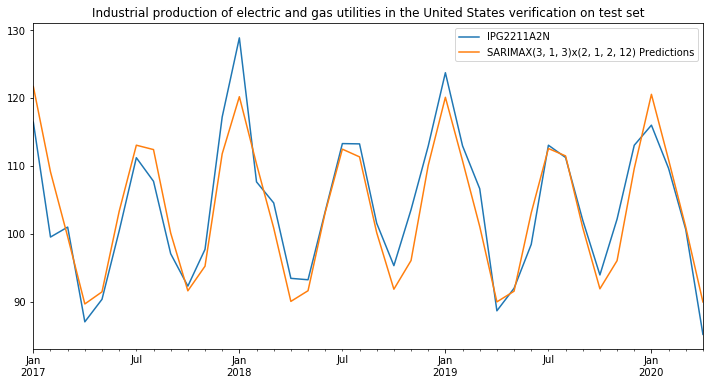

In [23]:
title = 'Industrial production of electric and gas utilities in the United States verification on test set'
ylabel = ''
xlabel = ''

ax = test.IPG2211A2N.plot(legend=True, figsize=(12,6), title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [12]:
from statsmodels.tools.eval_measures import rmse
rmseError = rmse(test.IPG2211A2N, predictions)
print(rmseError)

3.7896954374519924


In [25]:
def mape(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100.00

mapeError_first = mape(test.IPG2211A2N, predictions)
print(mapeError_first)

2.8965633962075734


In [13]:
model = SARIMAX(df.IPG2211A2N, order=stepwise_model.order, seasonal_order=stepwise_model.seasonal_order)
results = model.fit()
forecast = results.predict(len(df), len(df)+24).rename('SARIMA Forecast')

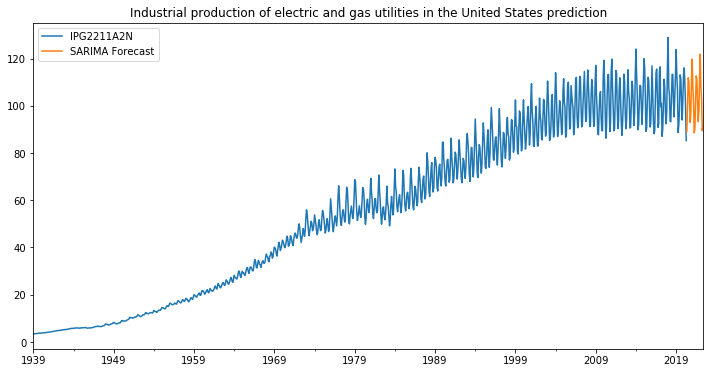

In [14]:
title = 'Industrial production of electric and gas utilities in the United States prediction'
ylabel = ''
xlabel = ''

ax = df.IPG2211A2N.plot(legend=True, figsize=(12,6), title=title)
forecast.plot(legend=True)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

# ============================================

In [119]:
df = pd.read_csv('SN_m_tot_V2.0.csv', sep=";")
df['date'] = pd.to_datetime(dict(year=df['year'], month=df['month'], day=1))
df.set_index('date', inplace=True)
df.index.freq='MS'
df = df.drop('year', 1)
df = df.drop('month', 1)
df.head()

,year_as_a_fraction,monthly_mean,monthly_mean_standard_deviation_of_the_input_sunspot_numbers,number_of_observations_used_to_compute_the_monthly_mean_total_sunspot_number,definitive/provisional_marker
date,,,,,
1749-01-01,1749.042,96.7,-1.0,-1,1
1749-02-01,1749.123,104.3,-1.0,-1,1
1749-03-01,1749.204,116.7,-1.0,-1,1
1749-04-01,1749.288,92.8,-1.0,-1,1
1749-05-01,1749.371,141.7,-1.0,-1,1


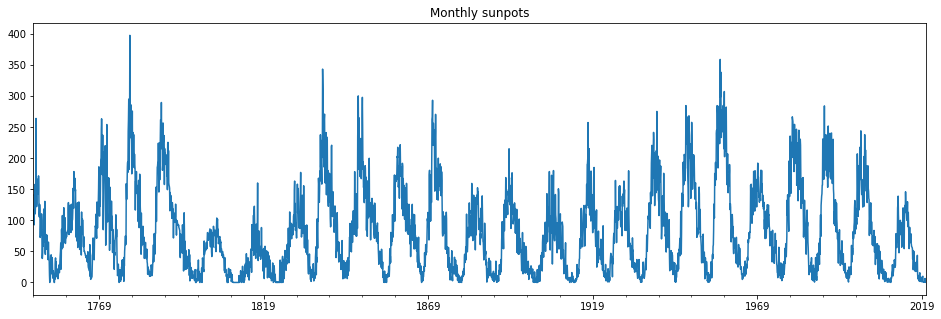

In [120]:
title = 'Monthly sunpots'
ylabel = ''
xlabel = ''
ax = df.monthly_mean.plot(figsize = (16,5), title=title)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

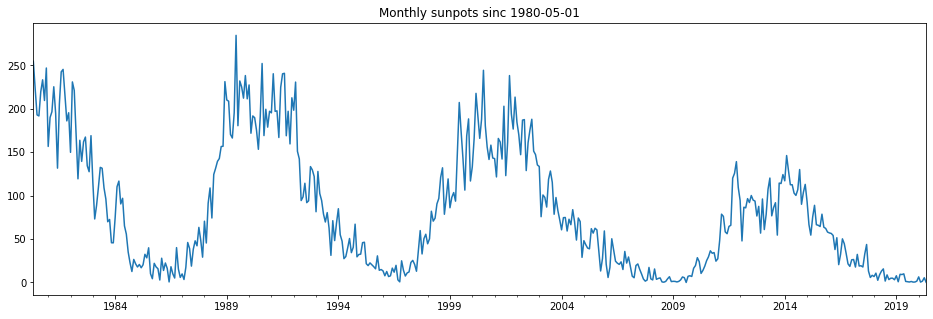

In [121]:
title = 'Monthly sunpots sinc 1980-05-01'
ylabel = ''
xlabel = ''
ax = df.monthly_mean['1980-05-01':].plot(figsize = (16,5), title=title)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

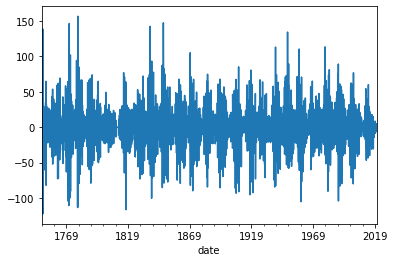

In [69]:
d = df['monthly_mean']
d1= d.diff(1)
df['d1'] = d1
df['d1'].plot()
df.dropna(inplace=True)

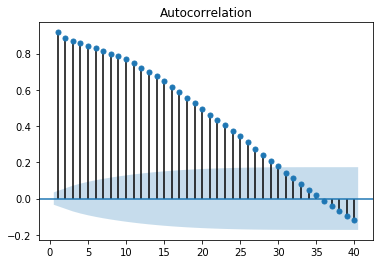

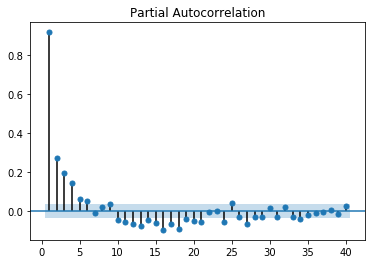

In [122]:
plot_acf(df.monthly_mean, zero=False, lags=40);
plot_pacf(df.monthly_mean, zero=False, lags=40);

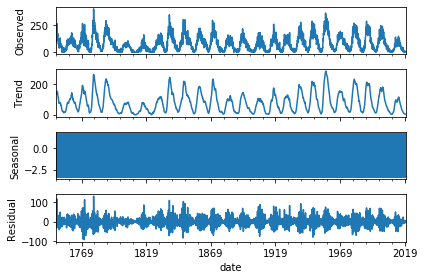

In [123]:
resd = seasonal_decompose(df.monthly_mean)
resd.plot();

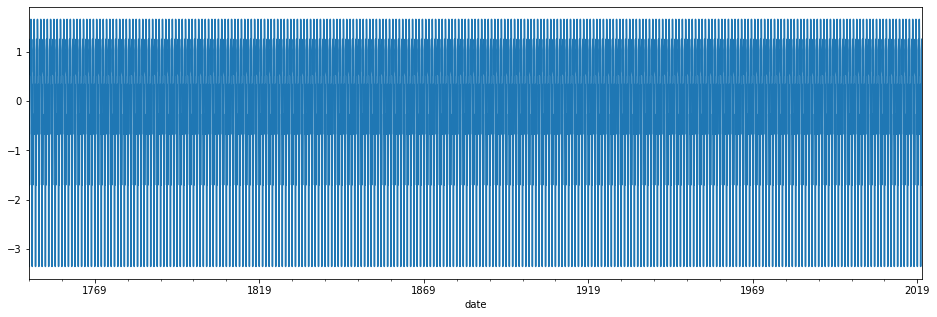

In [124]:
resd.seasonal.plot(figsize=(16,5))

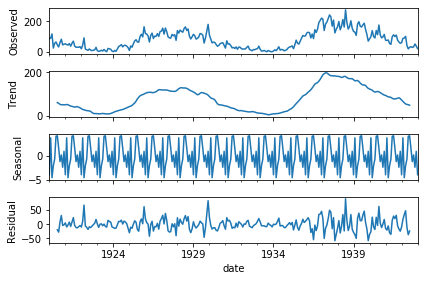

In [125]:
resd = seasonal_decompose(df.monthly_mean["1920-01-01":"1943-01-01"])
resd.plot();

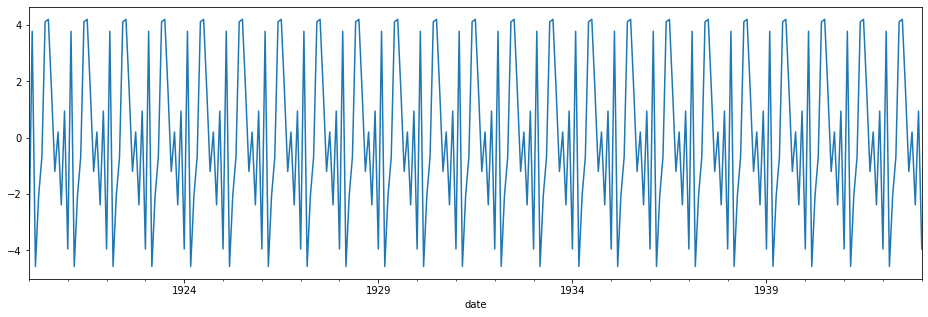

In [126]:
resd.seasonal.plot(figsize=(16,5))

In [41]:
stepwise_model = auto_arima(df.monthly_mean, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())
print(stepwise_model.order())
print(stepwise_model.seasonal_order())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=30226.085, BIC=30256.508, Fit time=14.314 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=32898.187, BIC=32910.356, Fit time=0.342 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=31786.863, BIC=31811.201, Fit time=11.516 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=30273.341, BIC=30297.679, Fit time=12.336 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=30218.978, BIC=30255.486, Fit time=19.924 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=31456.218, BIC=31486.641, Fit time=13.098 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=30221.895, BIC=30264.487, Fit time=147.058 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=32169.845, BIC=32194.184, Fit time=3.389 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=30220.366, BIC=30269.043, Fit time=103.053 seconds
F

TypeError: 'tuple' object is not callable

In [42]:
print(stepwise_model.aic())
print(stepwise_model.order)
print(stepwise_model.seasonal_order)

30141.96754694145
(2, 1, 2)
(0, 1, 1, 12)


In [43]:
train = df.loc['1749-01-01':'1990-05-01']
test = df.loc['1990-05-01':]

In [45]:
model_ses = SARIMAX(train.monthly_mean, order=stepwise_model.order, seasonal_order=stepwise_model.seasonal_order)
results_ses = model_ses.fit()
results_ses.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                       monthly_mean   No. Observations:                 2897
Model:             SARIMAX(2, 1, 2)x(0, 1, 1, 12)   Log Likelihood              -13446.941
Date:                            Tue, 16 Jun 2020   AIC                          26905.881
Time:                                    17:30:57   BIC                          26941.683
Sample:                                01-01-1749   HQIC                         26918.785
                                     - 05-01-1990                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3359      0.022     60.275      0.000       1.292       1.379
ar.L2         -0.3881      0.022    -17.433      0.000      -0.432      -0.344
ma.L1         -1.7660      0.014   -122.368      0.000      -1.794      -1.738
ma.L2          0.8066      0.014     56.330      0.000       0.779       0.835
ma.S.L12      -0.9982      0.021    -47.698      0.000      -1.039      -0.957
sigma2       643.1912     16.401     39.216      0.000     611.045     675.337
===================================================================================
Ljung-Box (Q):                       82.60   Jarque-Bera (JB):               833.99
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                             0.18
Prob(H) (two-sided):                  0.21   Kurtosis:                         5.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
start = len(train)
end = len(train) + len(test) - 1
predictions_ses = results_ses.predict(start=start, end=end, 
                              dynamic=False).rename('SARIMAX{}x{} Predictions'.format(str(stepwise_model.order), 
                                                                                      str(stepwise_model.seasonal_order)))

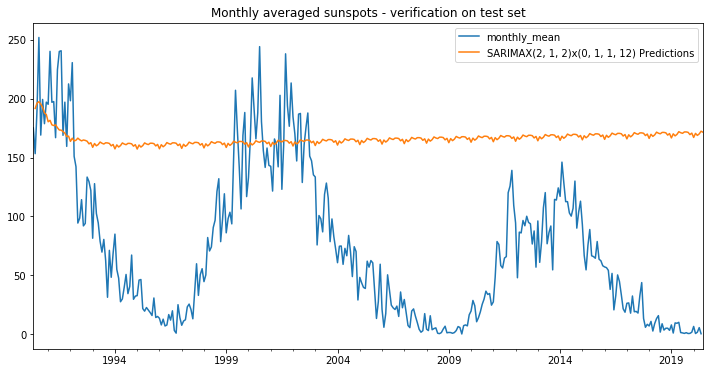

In [48]:
title = 'Monthly averaged sunspots - verification on test set'
ylabel = ''
xlabel = ''

ax = test.monthly_mean.plot(legend=True, figsize=(12,6), title=title)
predictions_ses.plot(legend=True)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [49]:
from statsmodels.tools.eval_measures import rmse
rmseError_ses = rmse(test.monthly_mean, predictions_ses)
print(rmseError_ses)

112.50121665393976


In [50]:
def mape(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100.00

mapeError_ses = mape(test.monthly_mean, predictions_ses)
print(mapeError_ses)

inf


In [70]:
import statsmodels.tsa.stattools as tsa
tsa.adfuller(df.d1)

(-9.09914424172324,
 3.645574718826538e-15,
 28,
 3227,
 {'1%': -3.432378047525015,
  '5%': -2.862436069383185,
  '10%': -2.5672469973560355},
 29859.13854578)

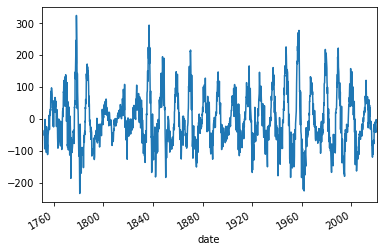

In [77]:
d = df['monthly_mean']
d12= d.diff(12)
df['d12'] = d12
df['d12'].plot()
df.dropna(inplace=True)

In [78]:
import statsmodels.tsa.stattools as tsa
tsa.adfuller(df.d12)

(-12.136021977610193,
 1.6928552599717824e-22,
 24,
 1577,
 {'1%': -3.4345034408379527,
  '5%': -2.863374496477375,
  '10%': -2.567746652650719},
 15197.064593761195)

In [51]:
stepwise_model_11_y = auto_arima(df.monthly_mean, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12*11,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model_11_y.aic())
print(stepwise_model_11_y.order)
print(stepwise_model_11_y.seasonal_order)

KeyboardInterrupt: 